In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline
import joblib

In [2]:
df1=pd.read_csv('train.csv')
df2=pd.read_csv('test.csv')

In [3]:
df1.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df2.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [5]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [6]:
df1.isna()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
159566,False,False,False,False,False,False,False,False
159567,False,False,False,False,False,False,False,False
159568,False,False,False,False,False,False,False,False
159569,False,False,False,False,False,False,False,False


In [7]:
df2.isna()

,id,comment_text
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
153159,False,False
153160,False,False
153161,False,False
153162,False,False


In [8]:
df1.shape

(159571, 8)

In [9]:
df2.shape

(153164, 2)

C:\Users\N E T HA Uday\AppData\Local\Temp\ipykernel_21708\1654473414.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df1.corr())
C:\Users\N E T HA Uday\AppData\Local\Temp\ipykernel_21708\1654473414.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(sns.heatmap(df1.corr()))


                  toxic  severe_toxic   obscene    threat    insult  \
toxic          1.000000      0.308619  0.676515  0.157058  0.647518   
severe_toxic   0.308619      1.000000  0.403014  0.123601  0.375807   
obscene        0.676515      0.403014  1.000000  0.141179  0.741272   
threat         0.157058      0.123601  0.141179  1.000000  0.150022   
insult         0.647518      0.375807  0.741272  0.150022  1.000000   
identity_hate  0.266009      0.201600  0.286867  0.115128  0.337736   

               identity_hate  
toxic               0.266009  
severe_toxic        0.201600  
obscene             0.286867  
threat              0.115128  
insult              0.337736  
identity_hate       1.000000  
Axes(0.125,0.11;0.62x0.77)


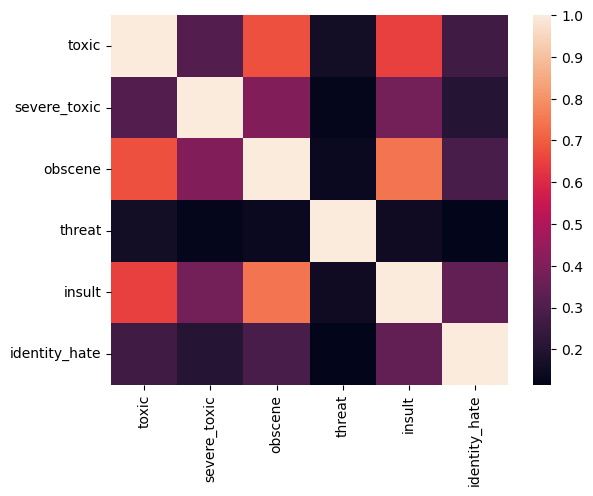

In [10]:
print(df1.corr())
print(sns.heatmap(df1.corr()))

In [11]:
df1.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
159566    False
159567    False
159568    False
159569    False
159570    False
Length: 159571, dtype: bool

In [12]:
df2.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
153159    False
153160    False
153161    False
153162    False
153163    False
Length: 153164, dtype: bool

In [13]:
df1.skew()

C:\Users\N E T HA Uday\AppData\Local\Temp\ipykernel_21708\149261804.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.skew()


toxic             2.745854
severe_toxic      9.851722
obscene           3.992817
threat           18.189001
insult            4.160540
identity_hate    10.515923
dtype: float64

In [14]:
# Replace email addresses with 'email'
df1['comment_text'] =df1['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
df1['comment_text'] =df1['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df1['comment_text'] =df1['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df1['comment_text'] =df1['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
   
# Replace numbers with 'number'
df1['comment_text'] =df1['comment_text'].str.replace(r'\d+(\.\d+)?', 'number')
# Remove punctuation
df1['comment_text'] =df1['comment_text'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
df1['comment_text'] =df1['comment_text'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df1['comment_text'] =df1['comment_text'].str.replace(r'^\s+|\s+?$', '')

C:\Users\N E T HA Uday\AppData\Local\Temp\ipykernel_21708\654417646.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['comment_text'] =df1['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')
C:\Users\N E T HA Uday\AppData\Local\Temp\ipykernel_21708\654417646.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['comment_text'] =df1['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
C:\Users\N E T HA Uday\AppData\Local\Temp\ipykernel_21708\654417646.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['comment_text'] =df1['comment_text'].str.replace(r'£|\$', 'dollers')
C:\Users\N E T HA Uday\AppData\Local\Temp\ipykernel_21708\654417646.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['comment_text'] =df1['comme

In [15]:
df1.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation Why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,D aww He matches this background colour I m se...,0,0,0,0,0,0
2,000113f07ec002fd,Hey man I m really not trying to edit war It s...,0,0,0,0,0,0
3,0001b41b1c6bb37e,More I can t make any real suggestions on impr...,0,0,0,0,0,0
4,0001d958c54c6e35,You sir are my hero Any chance you remember wh...,0,0,0,0,0,0


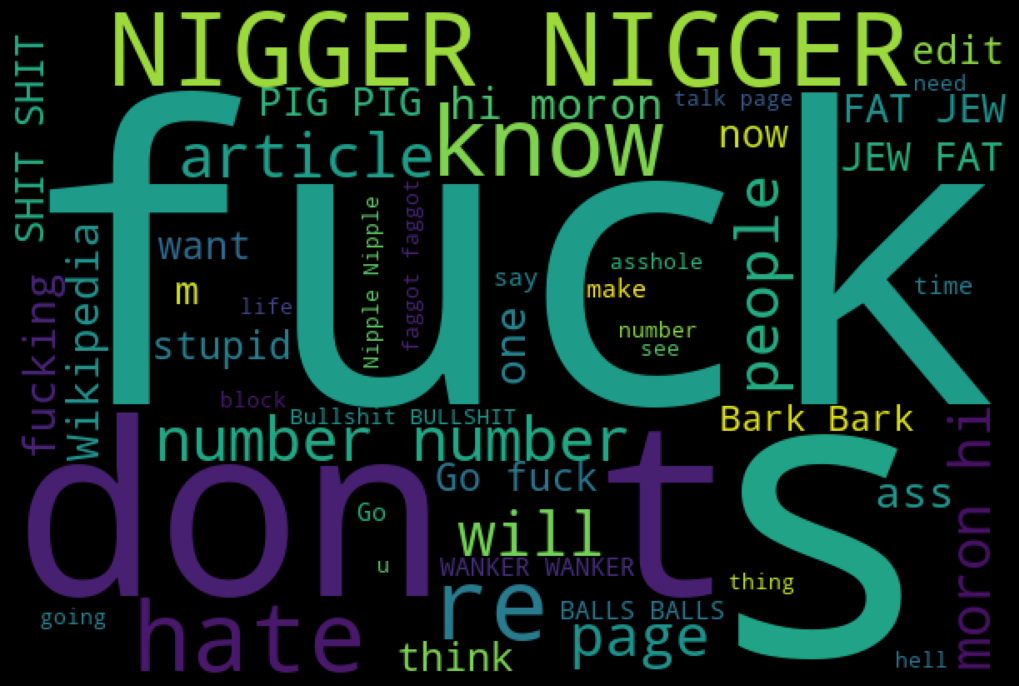

In [16]:
hams=df1['comment_text'][df1['toxic']==1]
spam_cloud = WordCloud(width=600, height=400, background_color = 'black', max_words=50).generate(''. join(hams))
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

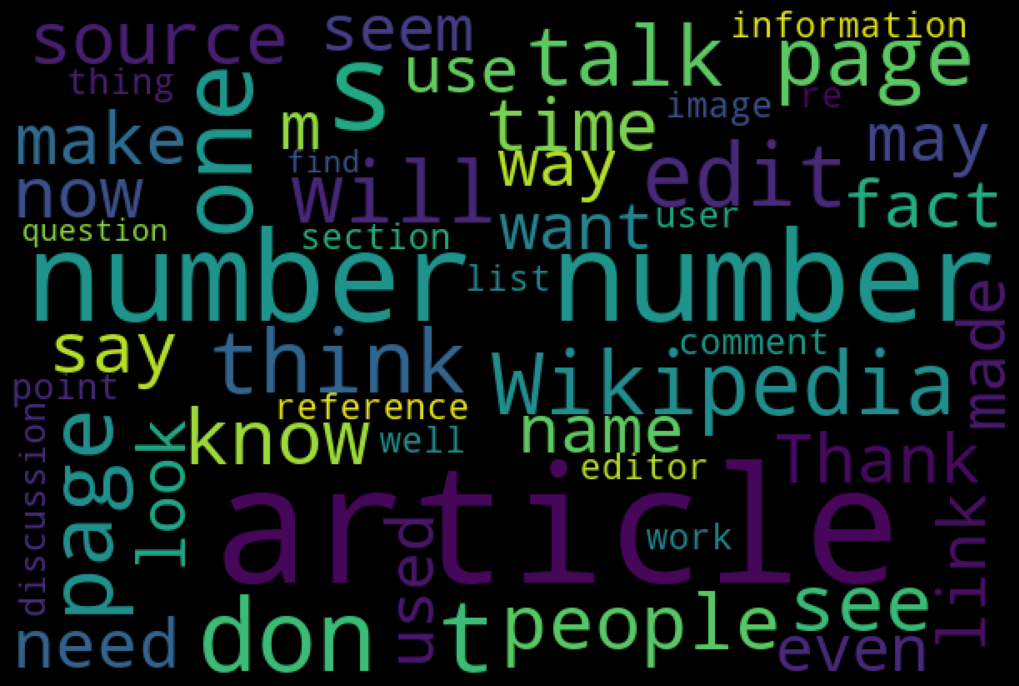

In [17]:
hams=df1['comment_text'][df1['toxic']==0]
spam_cloud = WordCloud(width=600, height=400, background_color = 'black', max_words=50).generate(''. join(hams))
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

toxic
0    144277
1     15294
Name: toxic, dtype: int64


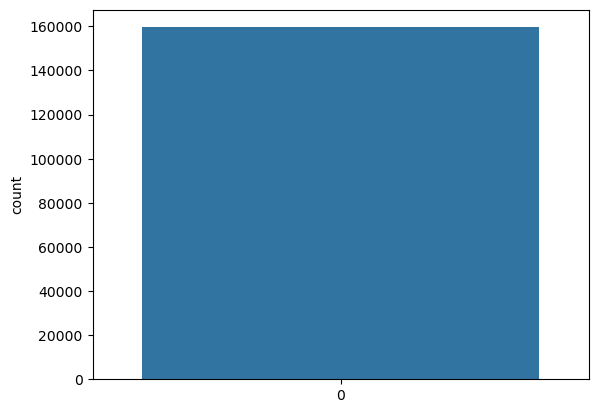

severe_toxic
0    157976
1      1595
Name: severe_toxic, dtype: int64


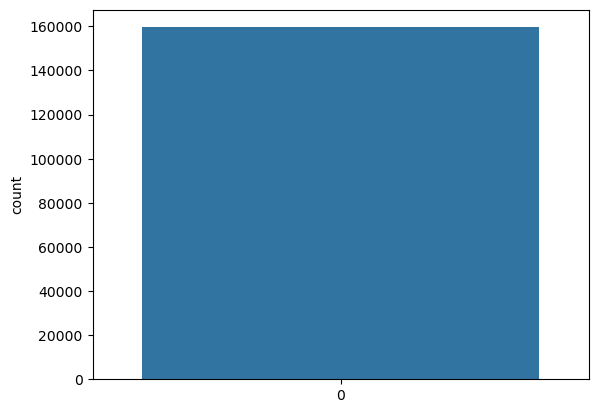

obscene
0    151122
1      8449
Name: obscene, dtype: int64


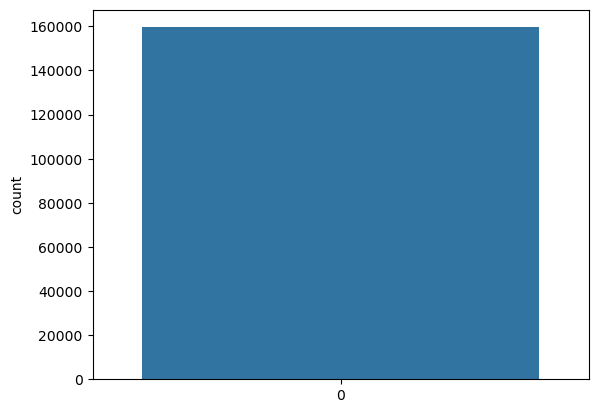

threat
0    159093
1       478
Name: threat, dtype: int64


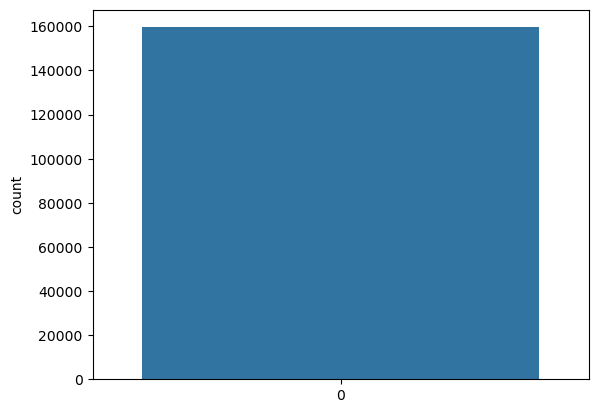

insult
0    151694
1      7877
Name: insult, dtype: int64


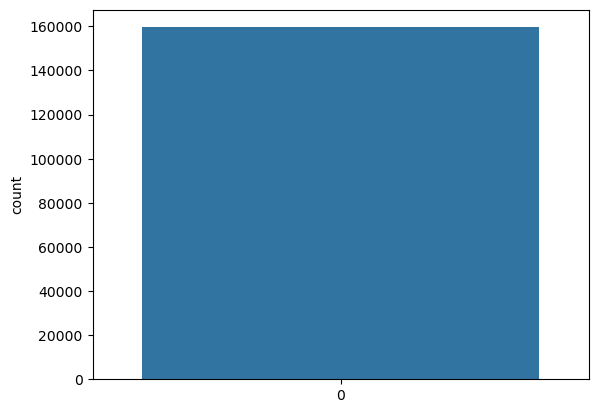

identity_hate
0    158166
1      1405
Name: identity_hate, dtype: int64


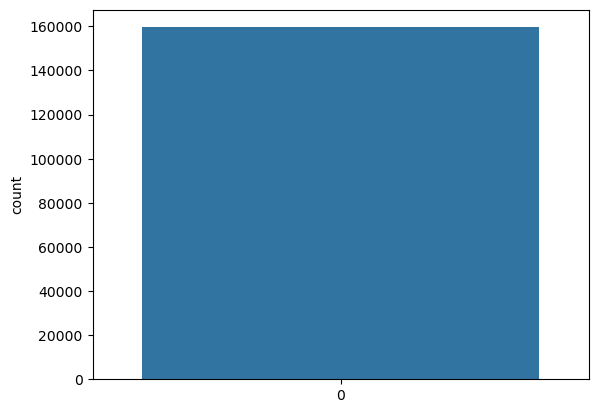

In [18]:
col = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult','identity_hate']
for i in col:
    print(i)
    print(df1[i].value_counts())
    sns.countplot(df1[i])
    plt.show()

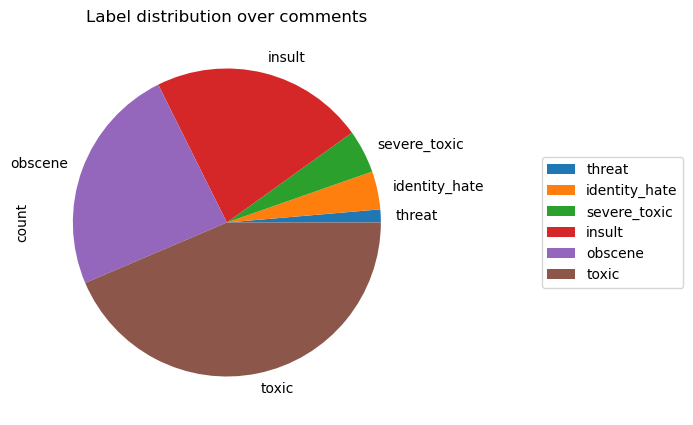

In [19]:
df_distribution = df1[col].sum()\
                          .to_frame()\
                          .rename(columns={0: 'count'})\
                          .sort_values('count')
df_distribution.plot.pie(y = 'count', 
                         title = 'Label distribution over comments', 
                         figsize=(5,5))\
.legend(loc = 'center left', bbox_to_anchor = (1.3, 0.5))

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')

# Transform the comment text into TF-IDF features
X = tfidf_vectorizer.fit_transform(df1['comment_text'])

# Labels
y = df1['toxic']


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

print(classification_report(y_test, y_pred))


Accuracy: 0.95
Precision: 0.91
Recall: 0.52
F1 Score: 0.66
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     28859
           1       0.91      0.52      0.66      3056

    accuracy                           0.95     31915
   macro avg       0.93      0.76      0.82     31915
weighted avg       0.95      0.95      0.94     31915



In [23]:
new_comments = ["You are so stupid!", "I love this!", "i hate you."]

new_comments_tfidf = tfidf_vectorizer.transform(new_comments)

predictions = nb_classifier.predict(new_comments_tfidf)

for comment, pred in zip(new_comments, predictions):
    print(f'Comment: "{comment}" - Toxic: {bool(pred)}')


Comment: "You are so stupid!" - Toxic: True
Comment: "I love this!" - Toxic: False
Comment: "i hate you." - Toxic: True


In [24]:
pip install flask

Note: you may need to restart the kernel to use updated packages.


In [25]:
import joblib
from IPython.display import display
import ipywidgets as widgets

# Load the model


# Create a text area widget for input
text_area = widgets.Textarea(
    value='',
    placeholder='Type a comment here',
    description='Comment:',
    disabled=False
)

# Function to display predictions
def display_predictions(comment):
   
    for label, score in predictions.items():
        print(f"{label}: {score:.2f}")

# Button to run predictions
button = widgets.Button(description="Classify")
output = widgets.Output()

def on_button_click(b):
    with output:
        output.clear_output()
        display_predictions(text_area.value)

button.on_click(on_button_click)

# Display the widgets
display(text_area, button, output)


Textarea(value='', description='Comment:', placeholder='Type a comment here')

Button(description='Classify', style=ButtonStyle())

Output()